In [2]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
from os.path import join, abspath
import sys
from os import pardir, mkdir

In [3]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [4]:
data_dir = join(root_data_dir, "Spectral-Class-Velocity")
data_dir

'/home2/s20321005/Thesis-Project/Data/Spectral-Class-Velocity'

In [5]:
a_type = vaex.open(join(data_dir, "A-type.hdf5"))
f_type = vaex.open(join(data_dir, "F-type.hdf5"))
g_type = vaex.open(join(data_dir, "G-type.hdf5"))
g_type

#,w,e_w,spectraltype_esphs
0,-9.590023669072771,0.023956980727508907,F
1,16.547108022089976,0.010300926715071157,G
2,33.16147423530458,0.03313949612412754,G
3,23.232425874782766,0.03457258873567302,G
4,6.200975829380684,0.01760915737454791,G
...,...,...,...
"1,325",16.01534653457238,0.027898021529253764,G
"1,326",-7.1882994564791955,0.012496910009595399,G
"1,327",14.107354617379562,0.018691735437401776,G
"1,328",9.275137350974589,0.013502434199310931,G


In [38]:
w_edges = np.linspace(-40,40,41)
ws = 0.5*(w_edges[1:]+w_edges[:-1])
w_a = a_type.w.to_numpy()
w_f = f_type.w.to_numpy()
w_g = g_type.w.to_numpy()
w_num_a, _ = np.histogram(w_a, w_edges)
w_num_f, _ = np.histogram(w_f, w_edges)
w_num_g, _ = np.histogram(w_g, w_edges)

ef_a = np.sqrt(w_num_a)
ef_f = np.sqrt(w_num_f)
ef_g = np.sqrt(w_num_g)

<ErrorbarContainer object of 3 artists>

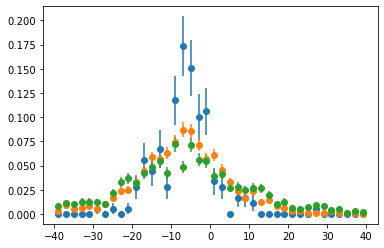

In [39]:
plt.errorbar(ws, w_num_a/w_num_a.sum(), yerr=ef_a/w_num_a.sum(), fmt="o", label="A")
plt.errorbar(ws, w_num_f/w_num_f.sum(), yerr=ef_f/w_num_f.sum(), fmt="o", label="F")
plt.errorbar(ws, w_num_g/w_num_g.sum(), yerr=ef_g/w_num_g.sum(), fmt="o", label="G")

Fit with the following distribution equation 
\begin{aligned}
  f(w) &= \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{\left(w-w_{\odot}\right)^2}{2\sigma^2}\right]}
\end{aligned}

In [28]:
w = np.linspace(-60, 60, 100)
def normal(w, wo, sigma, A):
    return A*norm.pdf(w, loc=wo, scale=sigma)

In [20]:
# A-type
popt, pcov = curve_fit(normal, ws, w_num_a)
wo_a, sigma_a, A_a = popt

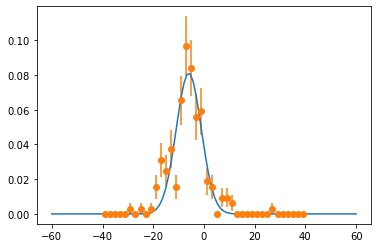

In [47]:
plt.plot(w, normal(w, wo_a, sigma_a, A_a)/A_a, label="A")
plt.errorbar(ws, w_num_a/A_a, yerr=ef_a/A_a, fmt="o")
plt.show()

In [30]:
# F-type
popt, pcov = curve_fit(normal, ws, w_num_f)
wo_f, sigma_f, A_f = popt

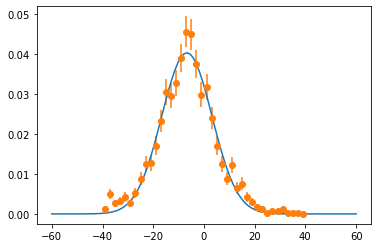

In [48]:
plt.plot(w, normal(w, wo_f, sigma_f, A_f)/A_f, label="F")
plt.errorbar(ws, w_num_f/A_f, yerr=ef_f/A_f, fmt="o")
plt.show()

In [32]:
# G-type
popt, pcov = curve_fit(normal, ws, w_num_g)
wo_g, sigma_g, A_g = popt

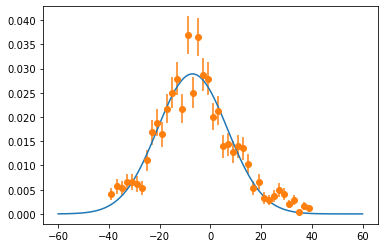

In [49]:
plt.plot(w, normal(w, wo_g, sigma_g, A_g)/A_g, label="G")
plt.errorbar(ws, w_num_g/A_g, yerr=ef_g/A_g, fmt="o")
plt.show()

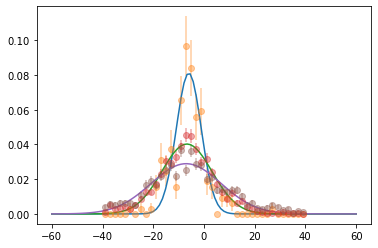

In [52]:

# all of them
plt.plot(w, normal(w, wo_a, sigma_a, A_a)/A_a, label="A")
plt.errorbar(ws, w_num_a/A_a, yerr=ef_a/A_a, fmt="o", alpha=0.4)
plt.plot(w, normal(w, wo_f, sigma_f, A_f)/A_f, label="F")
plt.errorbar(ws, w_num_f/A_f, yerr=ef_f/A_f, fmt="o",  alpha=0.4)
plt.plot(w, normal(w, wo_g, sigma_g, A_g)/A_g, label="G")
plt.errorbar(ws, w_num_g/A_g, yerr=ef_g/A_g, fmt="o", alpha=0.4)
plt.show()

In [53]:
df = vaex.from_arrays(type=["A", "F", "G"], wo=[wo_a, wo_f, wo_g], sigma=[sigma_a, sigma_f, sigma_g], A=[A_a, A_f, A_g])
df

#,type,wo,sigma,A
0,A,-5.98941,4.91812,321.274
1,F,-6.73832,9.91148,3054.33
2,G,-7.04128,13.7909,2437.44


In [54]:
name = "Velocity-Distribution"
data_dir = join(root_data_dir, name)
try:
  mkdir(data_dir)
  print(f"Creating {name} dir in Data dir")
except FileExistsError:
  print("Directory already exist. Good to go!")

Creating Velocity-Distribution dir in Data dir


In [55]:
df.export(join(data_dir, "Velocity-Distribution.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.40s =  0.0m =  0.0h
 